In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
elo_df = (
    pd.read_csv("ELO.csv", sep = ";")
    .rename(columns = {"Unnamed: 0": "filepath"})
    .assign(
        configuration = lambda a: a.filepath.str.split("/").str[-2],
        iteration = lambda a: a.filepath.str.split("/").str[-1].str.split("_").str[-1].str.split(".").str[0].astype("int"),
        ELO = lambda a: a.ELO + abs(a.ELO.min())
    )
    .sort_values(["configuration", "iteration"])
)
elo_df

,filepath,ELO,configuration,iteration
0,best_models/100_nonsymetric/checkpoint_1.h5,0.000000,100_nonsymetric,1
7,best_models/100_nonsymetric/checkpoint_2.h5,113.722497,100_nonsymetric,2
13,best_models/100_nonsymetric/checkpoint_3.h5,108.652863,100_nonsymetric,3
17,best_models/100_nonsymetric/checkpoint_4.h5,118.178125,100_nonsymetric,4
19,best_models/100_nonsymetric/checkpoint_5.h5,224.312110,100_nonsymetric,5
20,best_models/100_nonsymetric/checkpoint_8.h5,304.602120,100_nonsymetric,8
21,best_models/100_nonsymetric/checkpoint_9.h5,236.174710,100_nonsymetric,9
1,best_models/100_nonsymetric/checkpoint_10.h5,245.354526,100_nonsymetric,10
2,best_models/100_nonsymetric/checkpoint_11.h5,213.124819,100_nonsymetric,11
3,best_models/100_nonsymetric/checkpoint_12.h5,254.673475,100_nonsymetric,12


Text(0, 0.5, 'ELO')

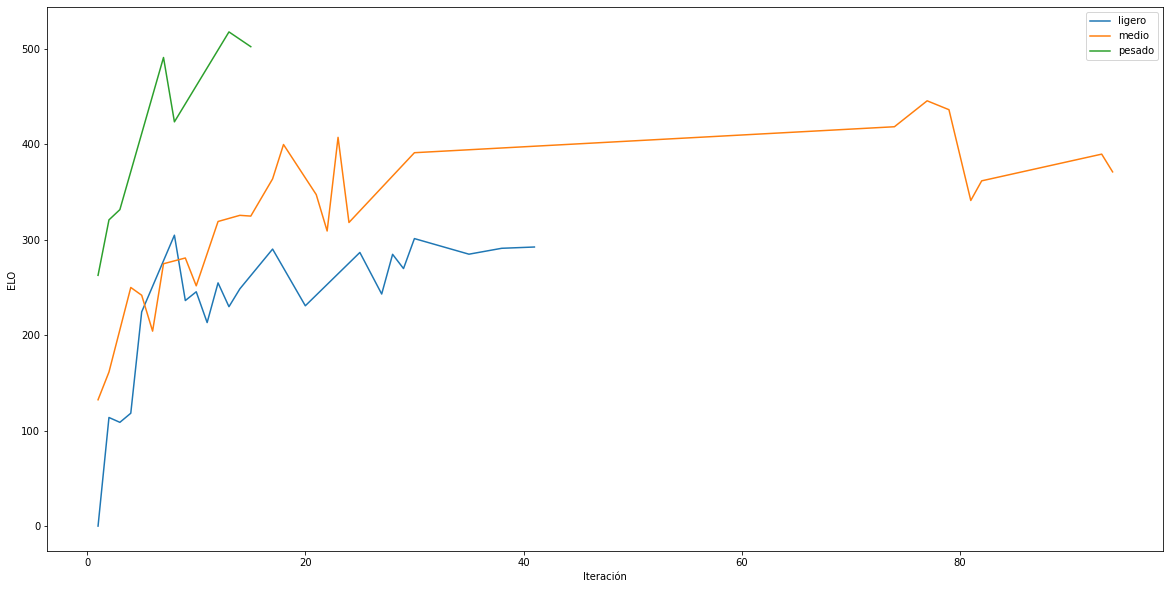

In [39]:
(
    elo_df
    .set_index("iteration")
    .assign(
        configuration = lambda a: a.configuration.replace({
            "100_nonsymetric": "ligero",
            "200_nonsymetric_10max": "medio",
            "200_nonsymetric_10max_100MCTS": "pesado"
        })
    )
    .groupby("configuration")
    .ELO
    .plot(legend=True, use_index=True, figsize = (20,10))
)
plt.xlabel("Iteración")
plt.ylabel("ELO")


In [4]:
(
    elo_df
    .assign(
        training = lambda a: a.configuration.replace({
            "100_nonsymetric": "ligero",
            "200_nonsymetric_10max": "medio",
            "200_nonsymetric_10max_100MCTS": "pesado"
        })
    )
    [["training", "iteration", "ELO"]]
    .sort_values(["training", "iteration"])
)

,training,iteration,ELO
0,ligero,1,0.000000
7,ligero,2,113.722497
13,ligero,3,108.652863
17,ligero,4,118.178125
19,ligero,5,224.312110
20,ligero,8,304.602120
21,ligero,9,236.174710
1,ligero,10,245.354526
2,ligero,11,213.124819
3,ligero,12,254.673475


## Análisis Win/lose/draw

### Ligero

In [31]:
light_df = (
    pd.read_csv("best_models/100_nonsymetric/100_nonsymetric_summary.txt", sep = ";")
    .rename(columns = {
        "win":"partidas ganadas",
        "lose": "partidas perdidas",
        "draw": "partidas empatadas"
    })
)
light_df.index = light_df.index + 1
light_df

,partidas ganadas,partidas perdidas,partidas empatadas
1,29,9,2
2,29,6,5
3,20,10,10
4,16,13,11
5,15,10,15
...,...,...,...
96,0,0,40
97,0,3,37
98,0,0,40
99,0,3,37


Text(0, 0.5, 'Cantidad')

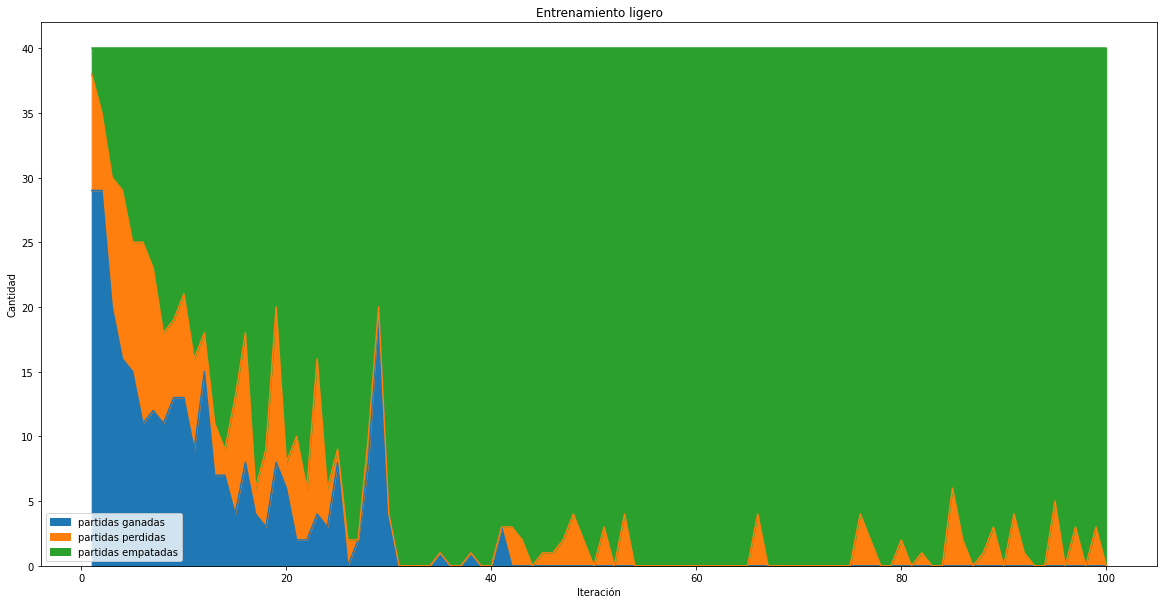

In [47]:
(
    light_df
    .plot(legend=True, use_index=True, figsize = (20,10), title = "Entrenamiento ligero", kind = "area")
)
plt.xlabel("Iteración")
plt.ylabel("Cantidad")

### Medio

In [33]:
medium_df = (
    pd.read_csv("best_models/200_nonsymetric_10max/200_nonsymetric_10max_summary.txt", sep = ";")
    .rename(columns = {
        "win":"partidas ganadas",
        "lose": "partidas perdidas",
        "draw": "partidas empatadas"
    })
)
medium_df.index = medium_df.index + 1
medium_df

,partidas ganadas,partidas perdidas,partidas empatadas
1,32,1,7
2,25,10,5
3,17,15,8
4,28,8,4
5,17,12,11
...,...,...,...
96,0,0,40
97,0,1,39
98,2,8,30
99,0,0,40


Text(0, 0.5, 'Cantidad')

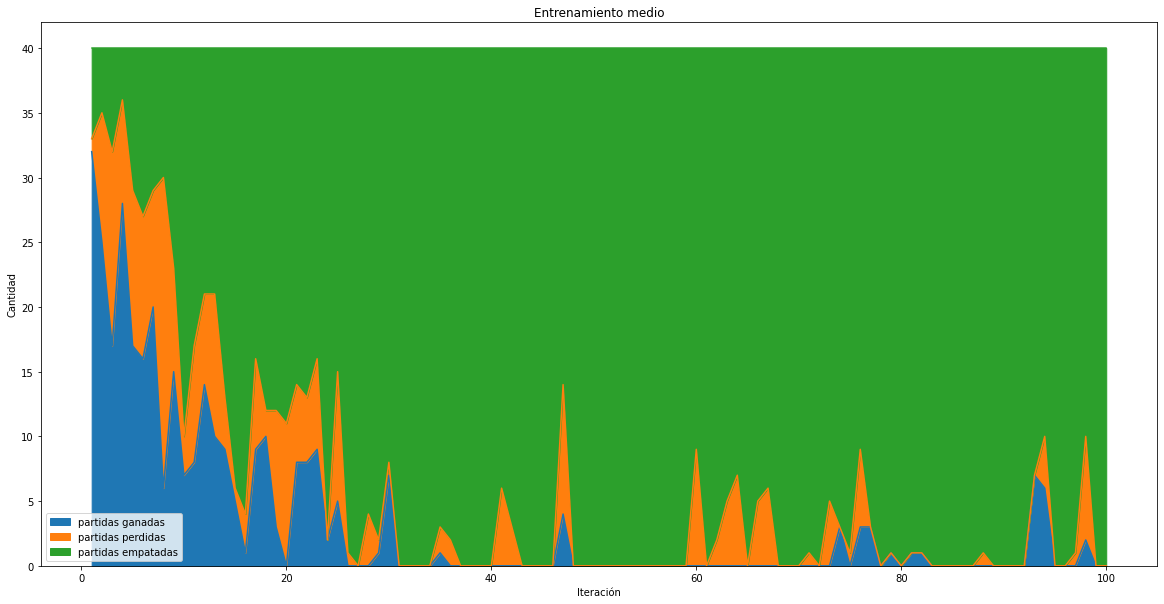

In [46]:
(
    medium_df
    .plot(legend=True, use_index=True, figsize = (20,10), title = "Entrenamiento medio", kind = "area")
)
plt.xlabel("Iteración")
plt.ylabel("Cantidad")

### Pesado

In [35]:
heavy_df = (
    pd.read_csv("best_models/200_nonsymetric_10max_100MCTS/200_nonsymetric_10max_100MCTS_summary.txt", sep = ";")
    .rename(columns = {
        "win":"partidas ganadas",
        "lose": "partidas perdidas",
        "draw": "partidas empatadas"
    })
)
heavy_df.index = heavy_df.index + 1
heavy_df

,partidas ganadas,partidas perdidas,partidas empatadas
1,19,0,1
2,7,3,10
3,11,0,9
4,3,9,8
5,4,5,11
6,1,2,17
7,2,1,17
8,8,4,8
9,0,2,18
10,2,3,15


([<matplotlib.axis.YTick at 0x7f6c69eaef10>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

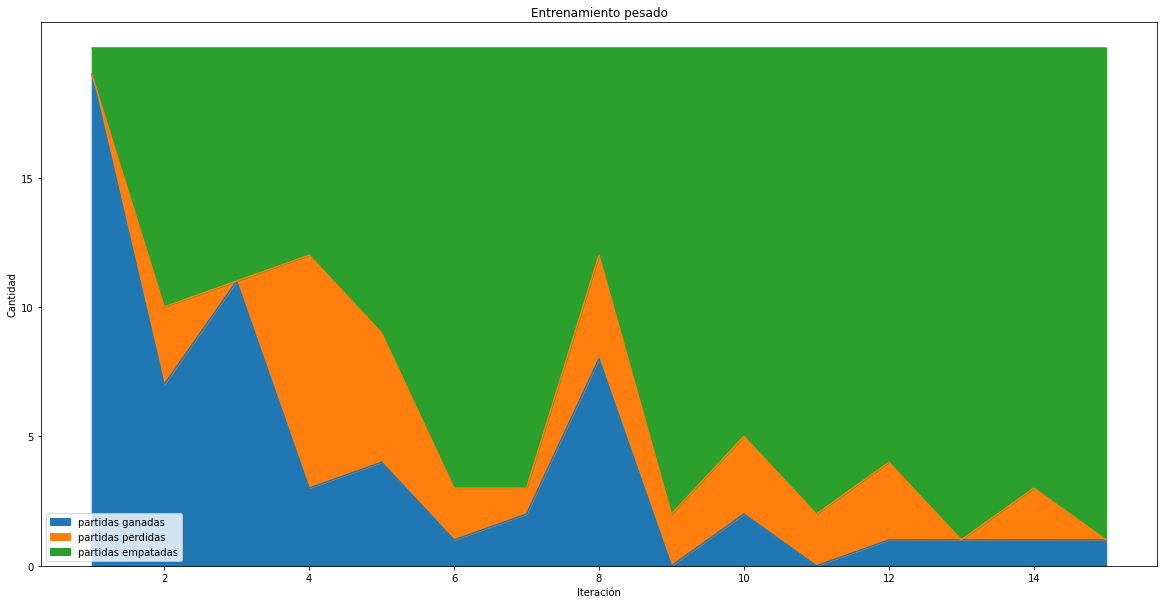

In [45]:
(
    heavy_df
    .plot(legend=True, use_index=True, figsize = (20,10), title = "Entrenamiento pesado", kind = "area")
)
plt.xlabel("Iteración")
plt.ylabel("Cantidad")
plt.yticks(range(0,20,5))

### Todas juntas

[Text(0.5, 0, 'Iteración'), Text(0, 0.5, 'Cantidad')]

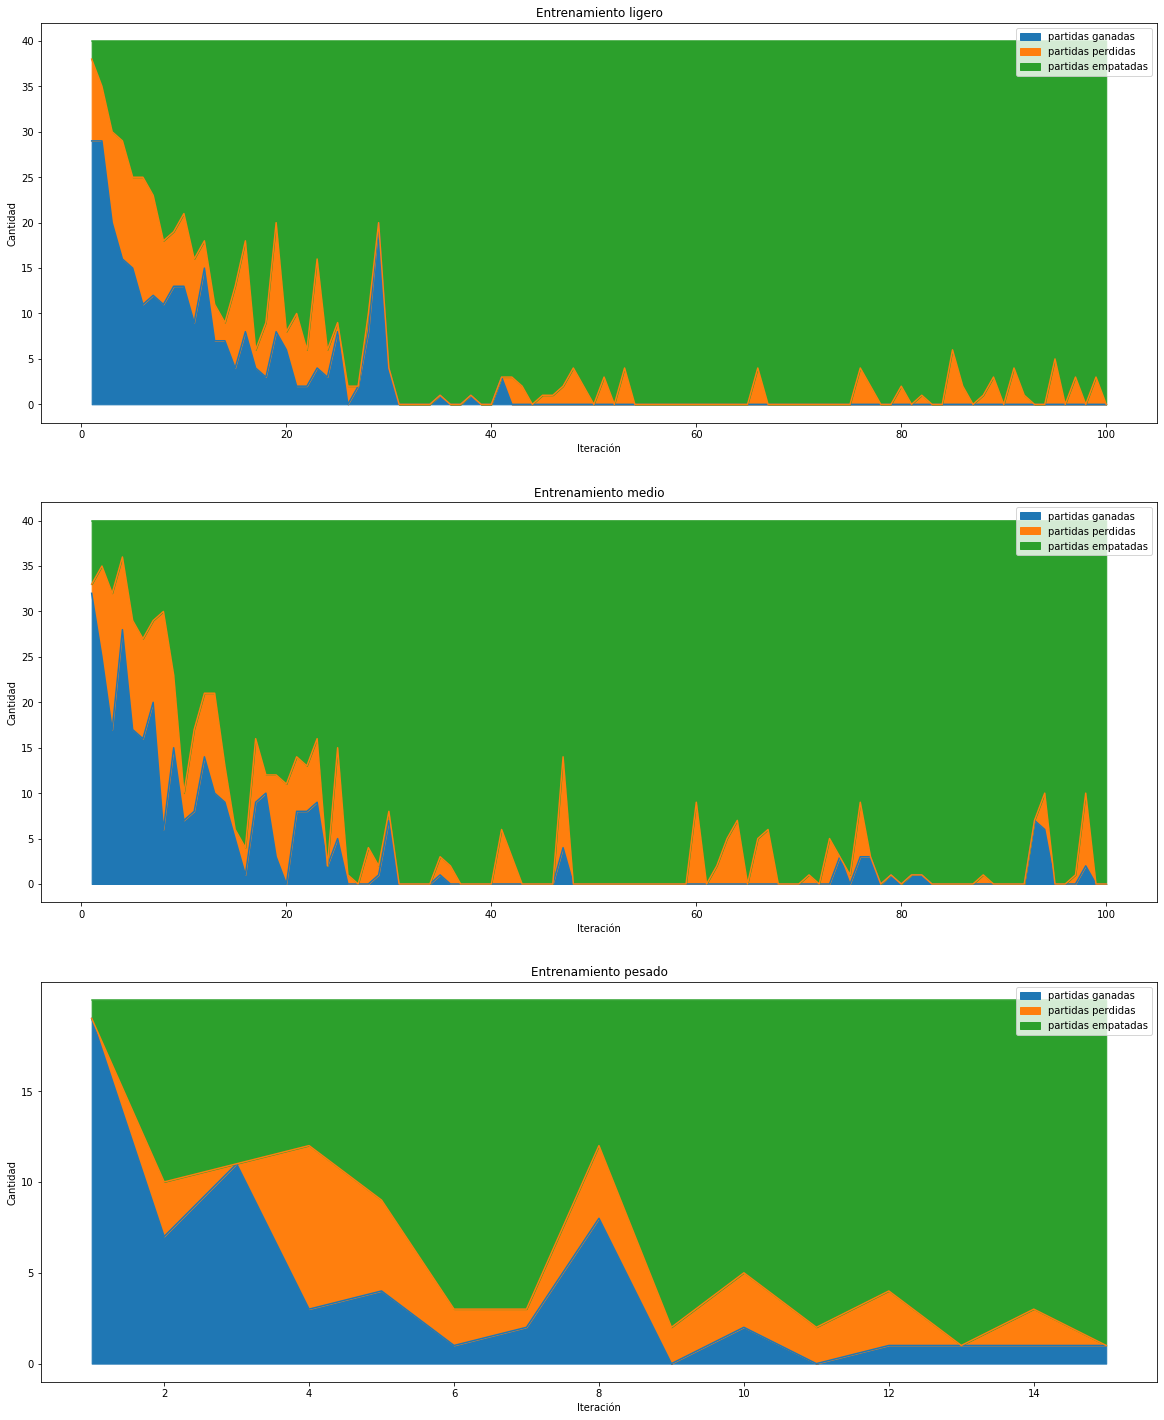

In [89]:
fig, axs = plt.subplots(3, figsize = (20,20))

(
    light_df
    .plot(legend=True, use_index=True, title = "Entrenamiento ligero", kind = "area", ax = axs[0])
)
axs[0].legend(loc='upper right')
axs[0].set(xlabel="Iteración", ylabel="Cantidad")
(
    medium_df
    .plot(legend=True, use_index=True, title = "Entrenamiento medio", kind = "area", ax = axs[1])
)
axs[1].legend(loc='upper right')
axs[1].set(xlabel="Iteración", ylabel="Cantidad")
(
    heavy_df
    .plot(legend=True, use_index=True, title = "Entrenamiento pesado", kind = "area", ax = axs[2])
)
plt.yticks(range(0,20,5))
axs[2].legend(loc='upper right')
axs[2].set(xlabel="Iteración", ylabel="Cantidad")